In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.cm as cm
%matplotlib inline
import scipy.misc
from PIL import Image
import scipy.io
import os


# Make sure that caffe is on the python path:
caffe_root = '../../'  # this file is expected to be in {caffe_root}/examples/Gambier/
import sys
sys.path.insert(0, caffe_root + 'python')

import caffe

In [2]:
data_root = './'
with open(data_root + 'images.txt') as f:
    test_lst = f.readlines()
    
test_lst = [data_root + 'images/' + x.strip() for x in test_lst]

In [3]:
im_lst = []
for i in range(0, len(test_lst)):
    im = Image.open(test_lst[i])
    im = np.stack((im,)*3, axis=-1)
    in_ = np.array(im, dtype=np.float32)   
    in_ = in_[:,:,::-1]
    in_ -= np.array((128, 128, 128))
    im_lst.append(in_)

In [4]:
#Visualization
def plot_single_scale(scale_lst, size):
    pylab.rcParams['figure.figsize'] = size, size/2
    
    plt.figure()
    for i in range(0, len(scale_lst)):
        s=plt.subplot(1,6,i+1)
        plt.imshow(scale_lst[i], cmap = cm.Greys_r)
        s.set_xticklabels([])
        s.set_yticklabels([])
        s.yaxis.set_ticks_position('none')
        s.xaxis.set_ticks_position('none')
    plt.tight_layout()

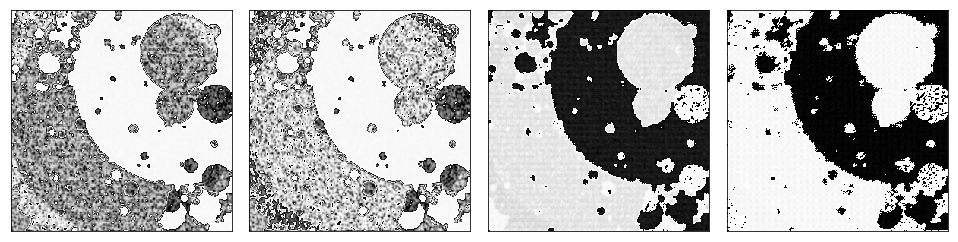

In [19]:
model_root = './models/'
pretrain_root = './pretrain/'



idx = 8
in_ = im_lst[idx]
in_ = in_[:,:,0,:]
in_ = cv2.resize(in_, dsize=(512, 512), interpolation=cv2.INTER_CUBIC)
in_ = in_.transpose((2,0,1))

net = caffe.Net(pretrain_root + 'pretrain_deploy_deadleaves.prototxt', model_root + 'deadleaves_iter_10000.caffemodel', caffe.TEST)

net.blobs['Data'].reshape(1, *in_.shape)
net.blobs['Data'].data[...] = in_

net.forward()

out1 = net.blobs['conv5'].data[0][0,:,:].astype('uint8')
out2 = net.blobs['conv5'].data[0][1,:,:].astype('uint8')
out3 = net.blobs['conv5'].data[0][2,:,:].astype('uint8')
out4 = net.blobs['conv5'].data[0][3,:,:].astype('uint8')
#out = (out1 + out2)/2

scale_lst = [out1, out2, out3, out4]
plot_single_scale(scale_lst, 20)

#img = Image.fromarray(out1)
#img.save('manga_cnn.png')

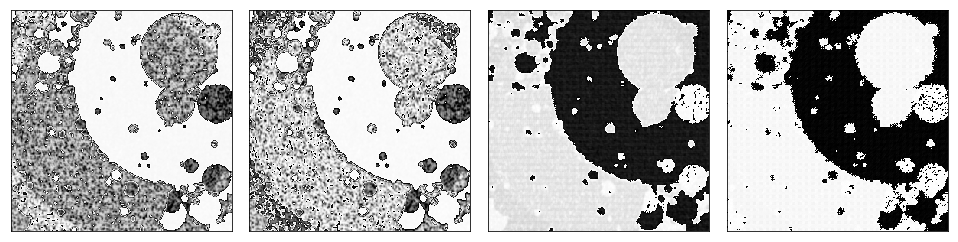

In [20]:
# load net
model_root = './models/'
train_root = './train/'

in_ = im_lst[idx]
in_ = in_[:,:,0,:]
in_ = cv2.resize(in_, dsize=(512, 512), interpolation=cv2.INTER_CUBIC)
in_ = in_.transpose((2,0,1))

net = caffe.Net(train_root + 'crf_deadleaves_deploy.prototxt', model_root + 'crf_deadleaves_iter_20000.caffemodel', caffe.TEST)

net.blobs['Data'].reshape(1, *in_.shape)
net.blobs['Data'].data[...] = in_

net.forward()

out1 = net.blobs['pred'].data[0][0,:,:].astype('uint8')
out2 = net.blobs['pred'].data[0][1,:,:].astype('uint8')
out3 = net.blobs['pred'].data[0][2,:,:].astype('uint8')
out4 = net.blobs['pred'].data[0][3,:,:].astype('uint8')

scale_lst = [out1,out2,out3,out4]
plot_single_scale(scale_lst, 20)

#img = Image.fromarray(out2)
#img.save('manga_crf.png')